# Lecture 4 - Filtered Back Projection

## Contents

* The adjoint of the Radon transform
* Some usefull properties of the Radon transform
* Filtered back projection
* Assignments

## The adjoint of the Radon transform

* The Radon transform integrates along lines
* The adjoint smears the sinogram back along these lines

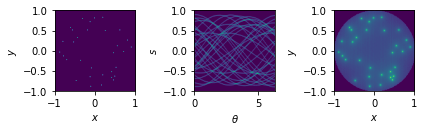

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from skimage.transform import radon, iradon

# settings
nx = 128
theta = np.linspace(0., 180., nx)

# phantom
mask = np.zeros((nx,nx))
ii,jj = disk((nx//2,nx//2),0.9 * (nx//2))
mask[ii,jj] = 1

u = np.zeros((nx,nx))
u = np.array(np.abs(np.random.randn(nx,nx)) >= 3, dtype=np.float)
u *= mask

# sinogram
f = radon(u, theta=theta)

# bp
u_bp = iradon(f, theta=theta, filter_name=None)

# plot
fig,ax = plt.subplots(1,3)

ax[0].imshow(u,extent=(-1,1,-1,1),vmin=0)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_aspect(1)

ax[1].imshow(f,extent=(0,2*np.pi,-1,1),vmin=0)
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r'$s$')
ax[1].set_aspect(np.pi)

ax[2].imshow(u_bp,extent=(-1,1,-1,1),vmin=0)
ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$y$')
ax[2].set_aspect(1)

fig.tight_layout()

plt.savefig('./figures/lecture4/bp_dots.png',dpi=300)

![](./figures/lecture4/bp_dots.png)

## Some useful properties of the Radon transform

## Filtered back projection

## Assignments

### Assignment 1

Implement filtered back projection for various filters and test its performance on noisy data.